In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('yeast.data.xlsx')

In [3]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

In [4]:
train = df_train
test = df_test

In [5]:
train.shape

(1038, 9)

In [6]:
test.shape

(446, 9)

In [7]:
train.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.503160,0.500125,0.501532,0.259865,0.505299,0.008324,0.499913,0.274133
std,0.136967,0.124160,0.087106,0.133399,0.051223,0.078801,0.057912,0.104292
min,0.110000,0.140000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.560000,0.320000,0.500000,0.000000,0.530000,0.297500
max,0.970000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [8]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

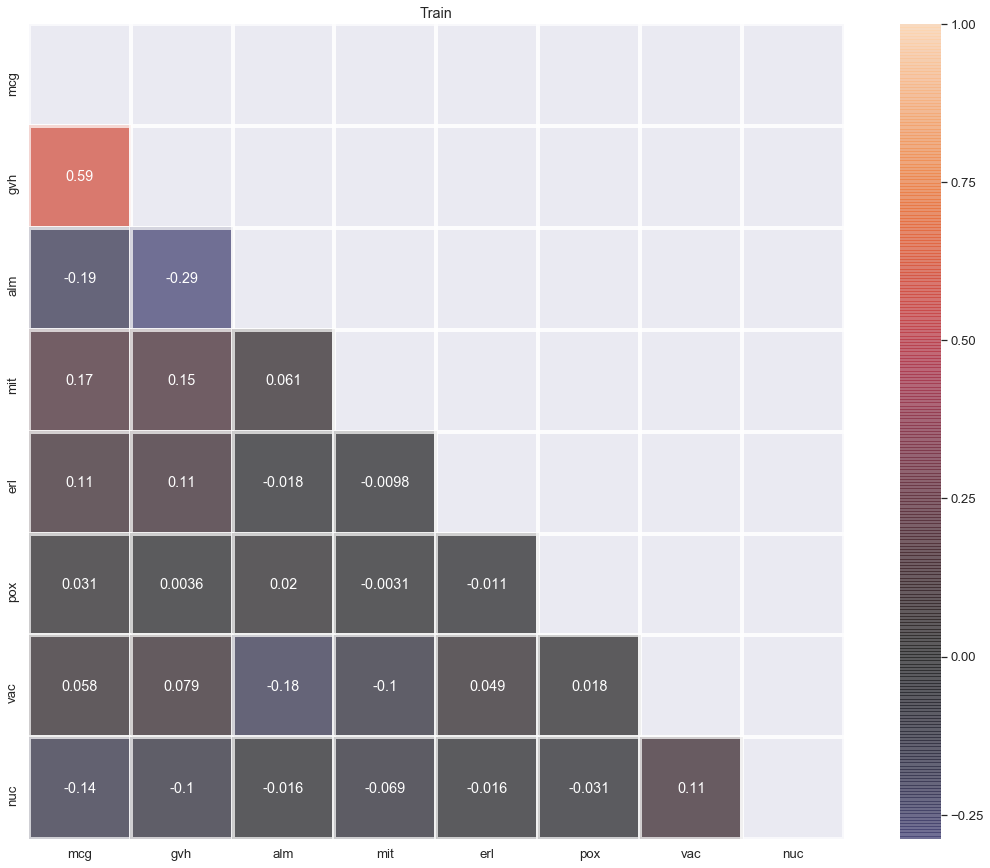

In [9]:
plot_df(train, 'Train')

In [10]:
print(train.columns)

Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class'], dtype='object')


In [11]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [12]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [13]:
temp_tr_ans = train[class_name]
temp_ts_ans = test[class_name]
class_count = len(temp_tr_ans.unique())
print(class_count)

10


In [14]:
temp_tr_ans

1228    ME3
1032    CYT
757     MIT
481     ME3
129     CYT
567     NUC
331     CYT
323     NUC
1440    ME3
651     MIT
554     NUC
135     CYT
485     ME3
493     MIT
710     MIT
435     NUC
1322    NUC
643     NUC
610     MIT
964     CYT
158     NUC
1112    NUC
1278    CYT
1447    NUC
352     CYT
774     CYT
1281    CYT
526     MIT
1202    ME3
617     MIT
       ... 
252     NUC
21      CYT
1337    VAC
459     MIT
1184    ME3
276     ME2
955     NUC
1215    CYT
385     NUC
805     NUC
1437    ME1
343     NUC
769     CYT
1332    MIT
130     CYT
871     MIT
1123    ME3
1396    CYT
87      EXC
330     ME3
1238    CYT
466     NUC
121     MIT
1044    MIT
1095    NUC
1130    ME3
1294    CYT
860     MIT
1459    CYT
1126    NUC
Name: class, Length: 1038, dtype: object

In [15]:
temp_ts_ans

123     MIT
432     MIT
1033    ME3
529     NUC
1417    ME3
629     MIT
297     CYT
1475    CYT
67      CYT
49      ME3
124     ME3
76      MIT
752     MIT
274     NUC
426     CYT
411     NUC
561     ME2
1453    ME3
324     ME3
952     NUC
259     NUC
1464    NUC
1433    ME3
462     MIT
1090    CYT
1103    NUC
602     MIT
1247    NUC
277     CYT
1116    MIT
       ... 
453     CYT
355     CYT
170     NUC
1108    ME3
423     ME3
1388    POX
209     MIT
634     ME1
140     CYT
1217    CYT
967     CYT
887     NUC
1176    CYT
746     VAC
1125    NUC
591     CYT
199     MIT
500     CYT
631     MIT
693     NUC
471     MIT
478     NUC
10      NUC
147     CYT
706     NUC
282     CYT
298     ME2
601     MIT
291     CYT
486     CYT
Name: class, Length: 446, dtype: object

In [16]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [17]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values='?', strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [18]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans, _ = pd.factorize(temp_tr_ans, sort=True)
ts_ans, _ = pd.factorize(temp_ts_ans, sort=True)

In [19]:
tr_ans

array([5, 0, 6, ..., 6, 0, 7], dtype=int64)

In [20]:
ts_ans

array([5, 5, 4, 6, 4, 5, 0, 0, 0, 4, 4, 5, 5, 6, 0, 6, 3, 4, 4, 6, 6, 6,
       4, 5, 0, 6, 5, 6, 0, 5, 5, 0, 4, 6, 5, 0, 7, 6, 6, 5, 0, 4, 6, 0,
       6, 5, 4, 0, 6, 0, 0, 5, 4, 0, 6, 5, 0, 8, 0, 4, 6, 3, 6, 2, 0, 0,
       3, 0, 0, 0, 0, 0, 5, 6, 2, 0, 6, 6, 0, 5, 5, 0, 4, 5, 0, 5, 0, 6,
       2, 0, 6, 0, 5, 6, 4, 1, 8, 5, 0, 0, 5, 0, 4, 0, 4, 0, 5, 5, 6, 6,
       8, 6, 6, 0, 0, 0, 2, 6, 5, 0, 5, 6, 6, 4, 6, 6, 0, 0, 6, 5, 1, 6,
       4, 6, 4, 4, 0, 5, 6, 0, 0, 8, 6, 4, 0, 6, 0, 6, 0, 1, 4, 6, 0, 0,
       0, 4, 0, 6, 4, 0, 3, 0, 6, 5, 6, 0, 2, 5, 5, 5, 0, 0, 6, 0, 5, 0,
       6, 0, 6, 1, 6, 6, 3, 6, 6, 4, 2, 5, 0, 5, 0, 0, 0, 0, 6, 0, 1, 0,
       6, 6, 5, 0, 6, 0, 3, 5, 5, 5, 8, 0, 0, 6, 5, 6, 0, 6, 5, 6, 0, 0,
       6, 0, 0, 6, 7, 6, 5, 2, 8, 0, 5, 1, 6, 4, 6, 6, 5, 0, 5, 5, 6, 6,
       4, 6, 0, 6, 6, 4, 4, 0, 0, 0, 4, 6, 6, 4, 5, 6, 5, 0, 0, 6, 0, 0,
       0, 0, 0, 6, 0, 6, 6, 0, 1, 0, 5, 1, 5, 5, 0, 5, 6, 6, 6, 0, 0, 2,
       6, 6, 6, 4, 4, 4, 6, 0, 6, 6, 0, 0, 0, 0, 2,

In [21]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [22]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [23]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [24]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [25]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,12]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [26]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
1038/1038 [==============================] - 3s 3ms/sample - loss: 2.8402 - acc: 0.4075
Epoch 2/64
1038/1038 [==============================] - 0s 384us/sample - loss: 2.4797 - acc: 0.4971
Epoch 3/64
1038/1038 [==============================] - 0s 400us/sample - loss: 2.3531 - acc: 0.5010s - loss: 2.2858 - acc: 0
Epoch 4/64
1038/1038 [==============================] - 0s 394us/sample - loss: 2.2567 - acc: 0.5202
Epoch 5/64
1038/1038 [==============================] - 0s 402us/sample - loss: 2.1886 - acc: 0.5212
Epoch 6/64
1038/1038 [==============================] - 0s 398us/sample - loss: 2.1468 - acc: 0.5260
Epoch 7/64
1038/1038 [==============================] - 0s 398us/sample - loss: 2.0992 - acc: 0.5453
Epoch 8/64
1038/1038 [=============

In [29]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
1038/1038 [==============================] - 2s 2ms/sample - loss: 2.5147 - acc: 0.2977
Epoch 2/64
1038/1038 [==============================] - 0s 241us/sample - loss: 2.0516 - acc: 0.4576
Epoch 3/64
1038/1038 [==============================] - 0s 283us/sample - loss: 1.9028 - acc: 0.4750
Epoch 4/64
1038/1038 [==============================] - 0s 241us/sample - loss: 1.8127 - acc: 0.5029
Epoch 5/64
1038/1038 [==============================] - 0s 241us/sample - loss: 1.7830 - acc: 0.5067
Epoch 6/64
1038/1038 [==============================] - 0s 256us/sample - loss: 1.7683 - acc: 0.5183
Epoch 7/64
1038/1038 [==============================] - 0s 251us/sample - loss: 1.7216 - acc: 0.5164
Epoch 8/64
1038/1038 [==============================] - 0s 271us/sample - loss: 1.7053 - acc: 0.5376
Epoch 9/64
1038/1038 [==============================] - 0s 256us/sample - loss: 1.6934 - acc: 0.5308
Epoch 10/64
1038/1038 [==============================] - 0s 248us/sample - loss: 1.6385 - acc

In [30]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.602119 using {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.579961 (0.033065) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.594412 (0.025233) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.600193 (0.037634) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.595376 (0.034762) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.588632 (0.033066) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.602119 (0.030708) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.574181 (0.025994) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.560694 (0.035240) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_unifo

In [31]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.605010 using {'activation': <function leaky_relu at 0x0000029613934840>, 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.583815 (0.043704) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.588632 (0.038943) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.596339 (0.035736) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.585742 (0.034143) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.602119 (0.035028) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.595376 (0.035240) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.579961 (0.024104) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.576108 (0.035423) with: {'activation': 'elu', 'hidden

In [32]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.08520179372197309
Confusion Matrix
[[ 27   1   0   0   0   0   8 108   0   1]
 [  0   0   2   2   0   0   3   3   0   0]
 [  0   0   0  11   0   0   3   1   0   0]
 [  3   0   0   1   2   0   2   3   0   0]
 [  2   0   0   0   0  41   1   7   0   0]
 [  6   0   0   0   0   3  45  20   0   0]
 [ 13   0   0   0   0   5   7 101   0   0]
 [  0   0   0   0   0   0   1   0   3   0]
 [  2   0   0   0   0   2   2   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.51      0.19      0.27       145
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00        15
         3.0       0.07      0.09      0.08        11
         4.0       0.00      0.00      0.00        51
         5.0       0.06      0.04      0.05        74
         6.0       0.10      0.06      0.07       126
         7.0       0.00      0.00      0.00         4
         8

In [33]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.23766816143497757
Confusion Matrix
[[87  0  0  0  1  2 12 43  0]
 [ 1  0  4  1  0  0  3  1  0]
 [ 0  0  2 13  0  0  0  0  0]
 [ 2  0  0  1  6  0  1  1  0]
 [ 1  0  0  0  1 43  1  5  0]
 [12  0  1  0  2  3 51  5  0]
 [36  0  0  0  1  5 12 72  0]
 [ 0  0  0  0  1  0  0  0  3]
 [ 3  0  1  0  0  2  1  3  0]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61       145
         1.0       0.00      0.00      0.00        10
         2.0       0.25      0.13      0.17        15
         3.0       0.07      0.09      0.08        11
         4.0       0.08      0.02      0.03        51
         5.0       0.05      0.04      0.05        74
         6.0       0.15      0.10      0.12       126
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00        10

   micro avg       0.24      0.24      0.24       446
   macro avg       0.14      0.11      0.12       446
weighte

In [34]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)